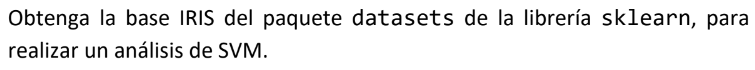

In [58]:
# obtener iris dataset de sklearn a dataframe
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


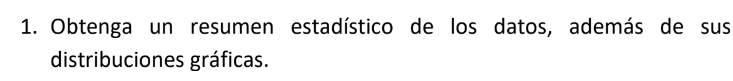

In [59]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


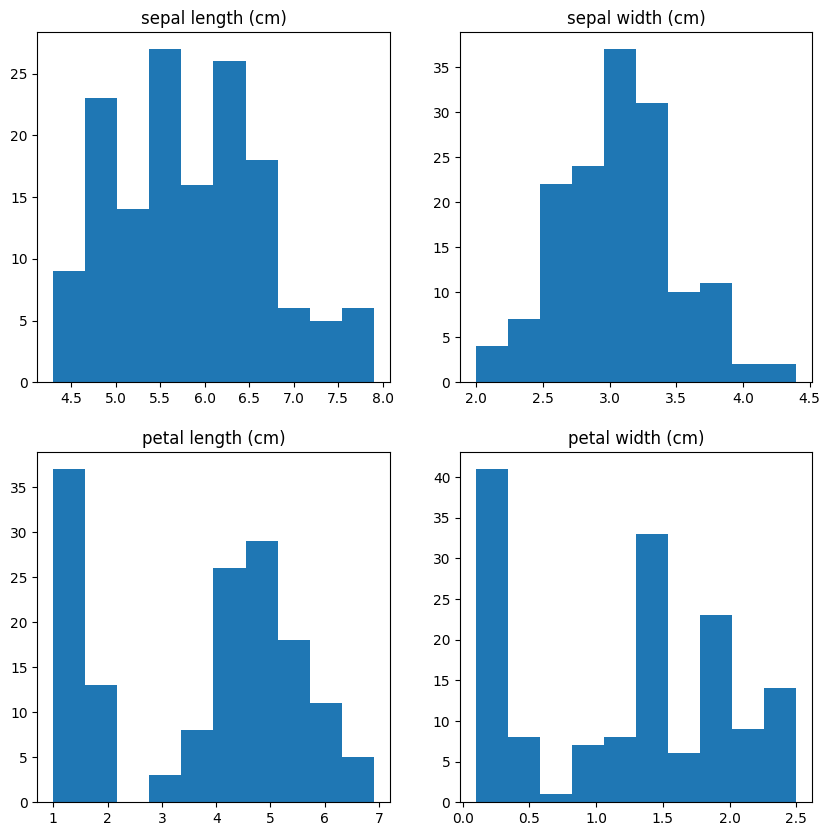

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df['sepal length (cm)'])
axs[0, 0].set_title('sepal length (cm)')
axs[0, 1].hist(df['sepal width (cm)'])
axs[0, 1].set_title('sepal width (cm)')
axs[1, 0].hist(df['petal length (cm)'])
axs[1, 0].set_title('petal length (cm)')
axs[1, 1].hist(df['petal width (cm)'])
axs[1, 1].set_title('petal width (cm)')
plt.show()

In [61]:
# Observando los datos se puede ver que el sepal width tiene una distribución mas parecida a una normal que el resto de los datos.

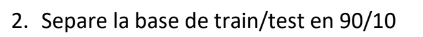

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.1, random_state=42)

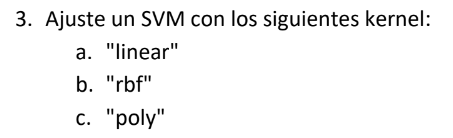

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [65]:
# Generar svm con kernel lineal
svm_lineal = SVC(kernel='linear')

# Generar svm con kernel rbf
svm_rbf = SVC(kernel='rbf')

# Generar svm con kernel polinomial
svm_poly = SVC(kernel='poly')

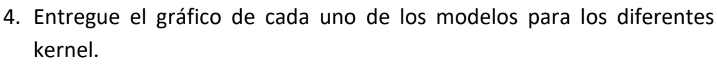

In [66]:
# Fit de los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [67]:
# Obtener predicciones 
y_pred_lineal = svm_lineal.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


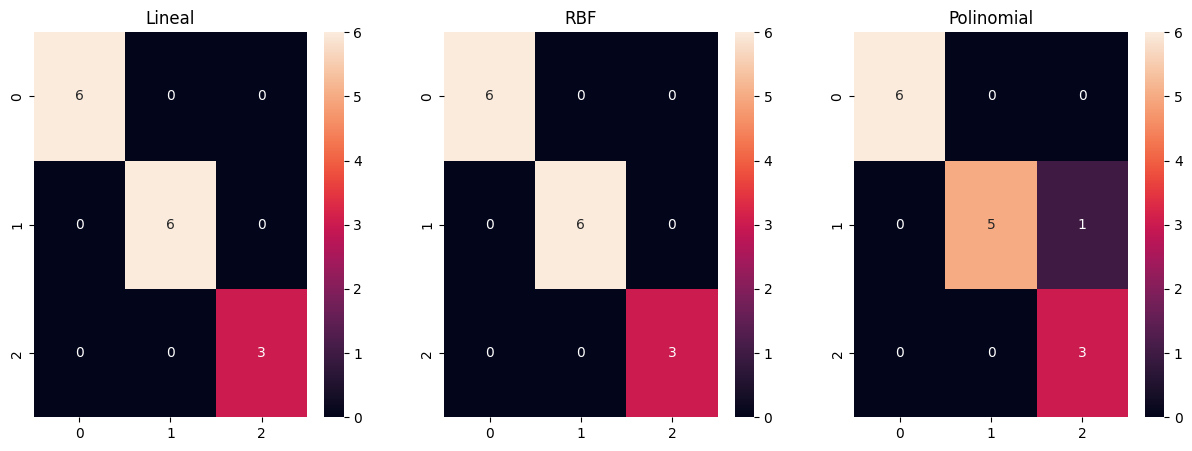

In [68]:
import seaborn as sns

matriz_lineal = confusion_matrix(y_test, y_pred_lineal)
matriz_rbf = confusion_matrix(y_test, y_pred_rbf)
matriz_poly = confusion_matrix(y_test, y_pred_poly)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(matriz_lineal, annot=True, ax=axs[0])
axs[0].set_title('Lineal')
sns.heatmap(matriz_rbf, annot=True, ax=axs[1])
axs[1].set_title('RBF')
sns.heatmap(matriz_poly, annot=True, ax=axs[2])
axs[2].set_title('Polinomial')
plt.show()

# Preparar arreglos solo con predicción utilizando sepals

In [69]:
X = iris.data[:, :2]
y = iris.target

In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

In [81]:
# Generar svm con kernel lineal
svm_lineal = SVC(kernel='linear')

# Generar svm con kernel rbf
svm_rbf = SVC(kernel='rbf')

# Generar svm con kernel polinomial
svm_poly = SVC(kernel='poly')

In [82]:
# Fit de los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [83]:
# Obtener predicciones 
y_pred_lineal = svm_lineal.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


# Graficar Ajuste Lineal

In [84]:
# Make predictions on the testing set
y_pred = svm_lineal.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = svm_lineal.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


Text(0.5, 1.0, 'SVM Lineal')

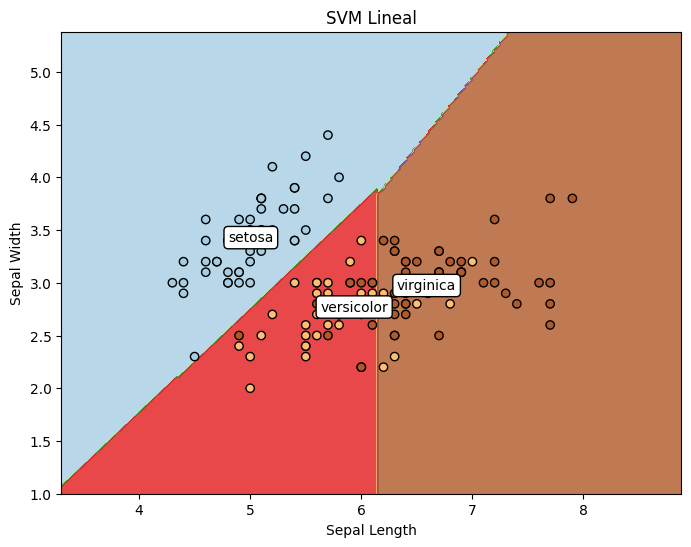

In [85]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_lineal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Lineal')

# Graficar Ajuste RBF

In [86]:
# Make predictions on the testing set
y_pred = svm_rbf.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = svm_rbf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


Text(0.5, 1.0, 'SVM RBF')

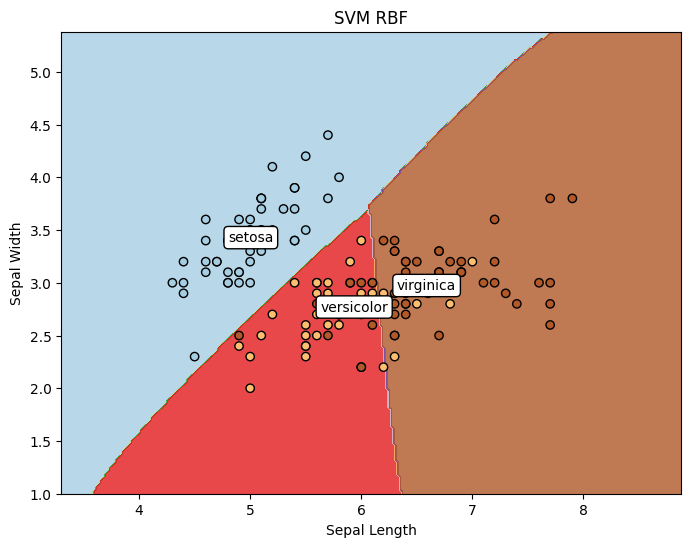

In [87]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM RBF')

# Graficar Ajuste Poly

In [88]:
# Make predictions on the testing set
y_pred = svm_poly.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = svm_poly.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


Text(0.5, 1.0, 'SVM Poly')

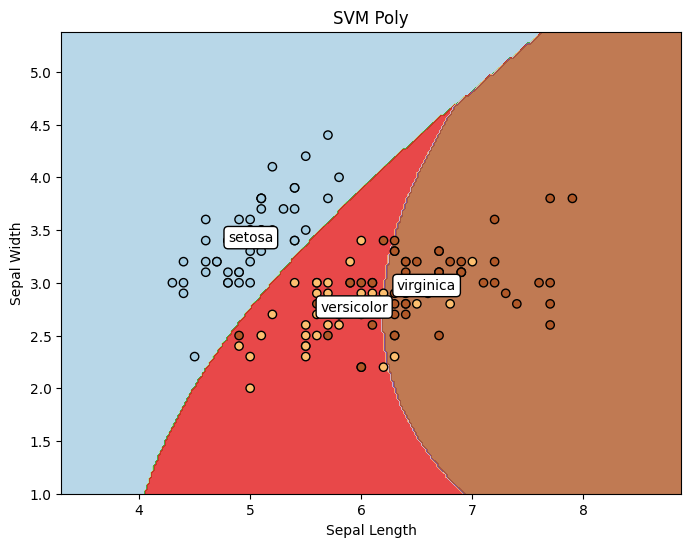

In [89]:
# Plot the decision boundary
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Make predictions on the meshgrid points
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap=plt.cm.Paired,
    edgecolors='black',
)

# Add class labels
for i, label in enumerate(iris.target_names):
    ax.text(
        X[y == i, 0].mean(), X[y == i, 1].mean(),
        label,
        color='black',
        backgroundcolor='white',
        ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('SVM Poly')